In [93]:
import geopandas as gpd
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import geopy

Los archivos a analizar deben de ser almacenados en la carpeta datos, y debe de existir unicamente un archivo shp son sus respectivas correlaciones necesarias.

In [103]:
print("Selecciona 1 si desea exportar la matriz de incidenica y la matriz de caminos mínimos en un archivo csv, seleccione 2 de lo contrario.")
selección = input("Ingresa la opción seleccionada")

Selecciona 1 si desea exportar la matriz de incidenica y la matriz de caminos mínimos en un archivo csv, seleccione 2 de lo contrario.


In [94]:
# Obtener la ruta de la carpeta "datos"
carpeta = os.path.join(os.getcwd(), 'Datos')

# Buscar el archivo .shp dentro de la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith('.shp'):
        # Leer el archivo con GeoPandas
        ruta_archivo = os.path.join(carpeta, archivo)
        red = gpd.read_file(ruta_archivo)
        break

red_df = pd.DataFrame(red)
red_df.to_csv('..\\Programa\\Datos\\nuevo.csv')
# Define una función para extraer las coordenadas de inicio y fin de cada línea
def get_start_end_coords(line):
    start = line.coords[0]
    end = line.coords[-1]
    return pd.Series({'start_lat': start[1], 'start_lon': start[0], 'end_lat': end[1], 'end_lon': end[0]})

# Aplica la función a cada fila del GeoDataFrame y crea cuatro nuevas columnas
red[['start_lat', 'start_lon', 'end_lat', 'end_lon']] = red.geometry.apply(get_start_end_coords)
# Convierte el objeto GeoDataFrame a un DataFrame de pandas
red_df = pd.DataFrame(red)

# Exporta el DataFrame a un archivo csv
red_df.to_csv('..\\Programa\\Datos\\nuevo.csv', index=False)


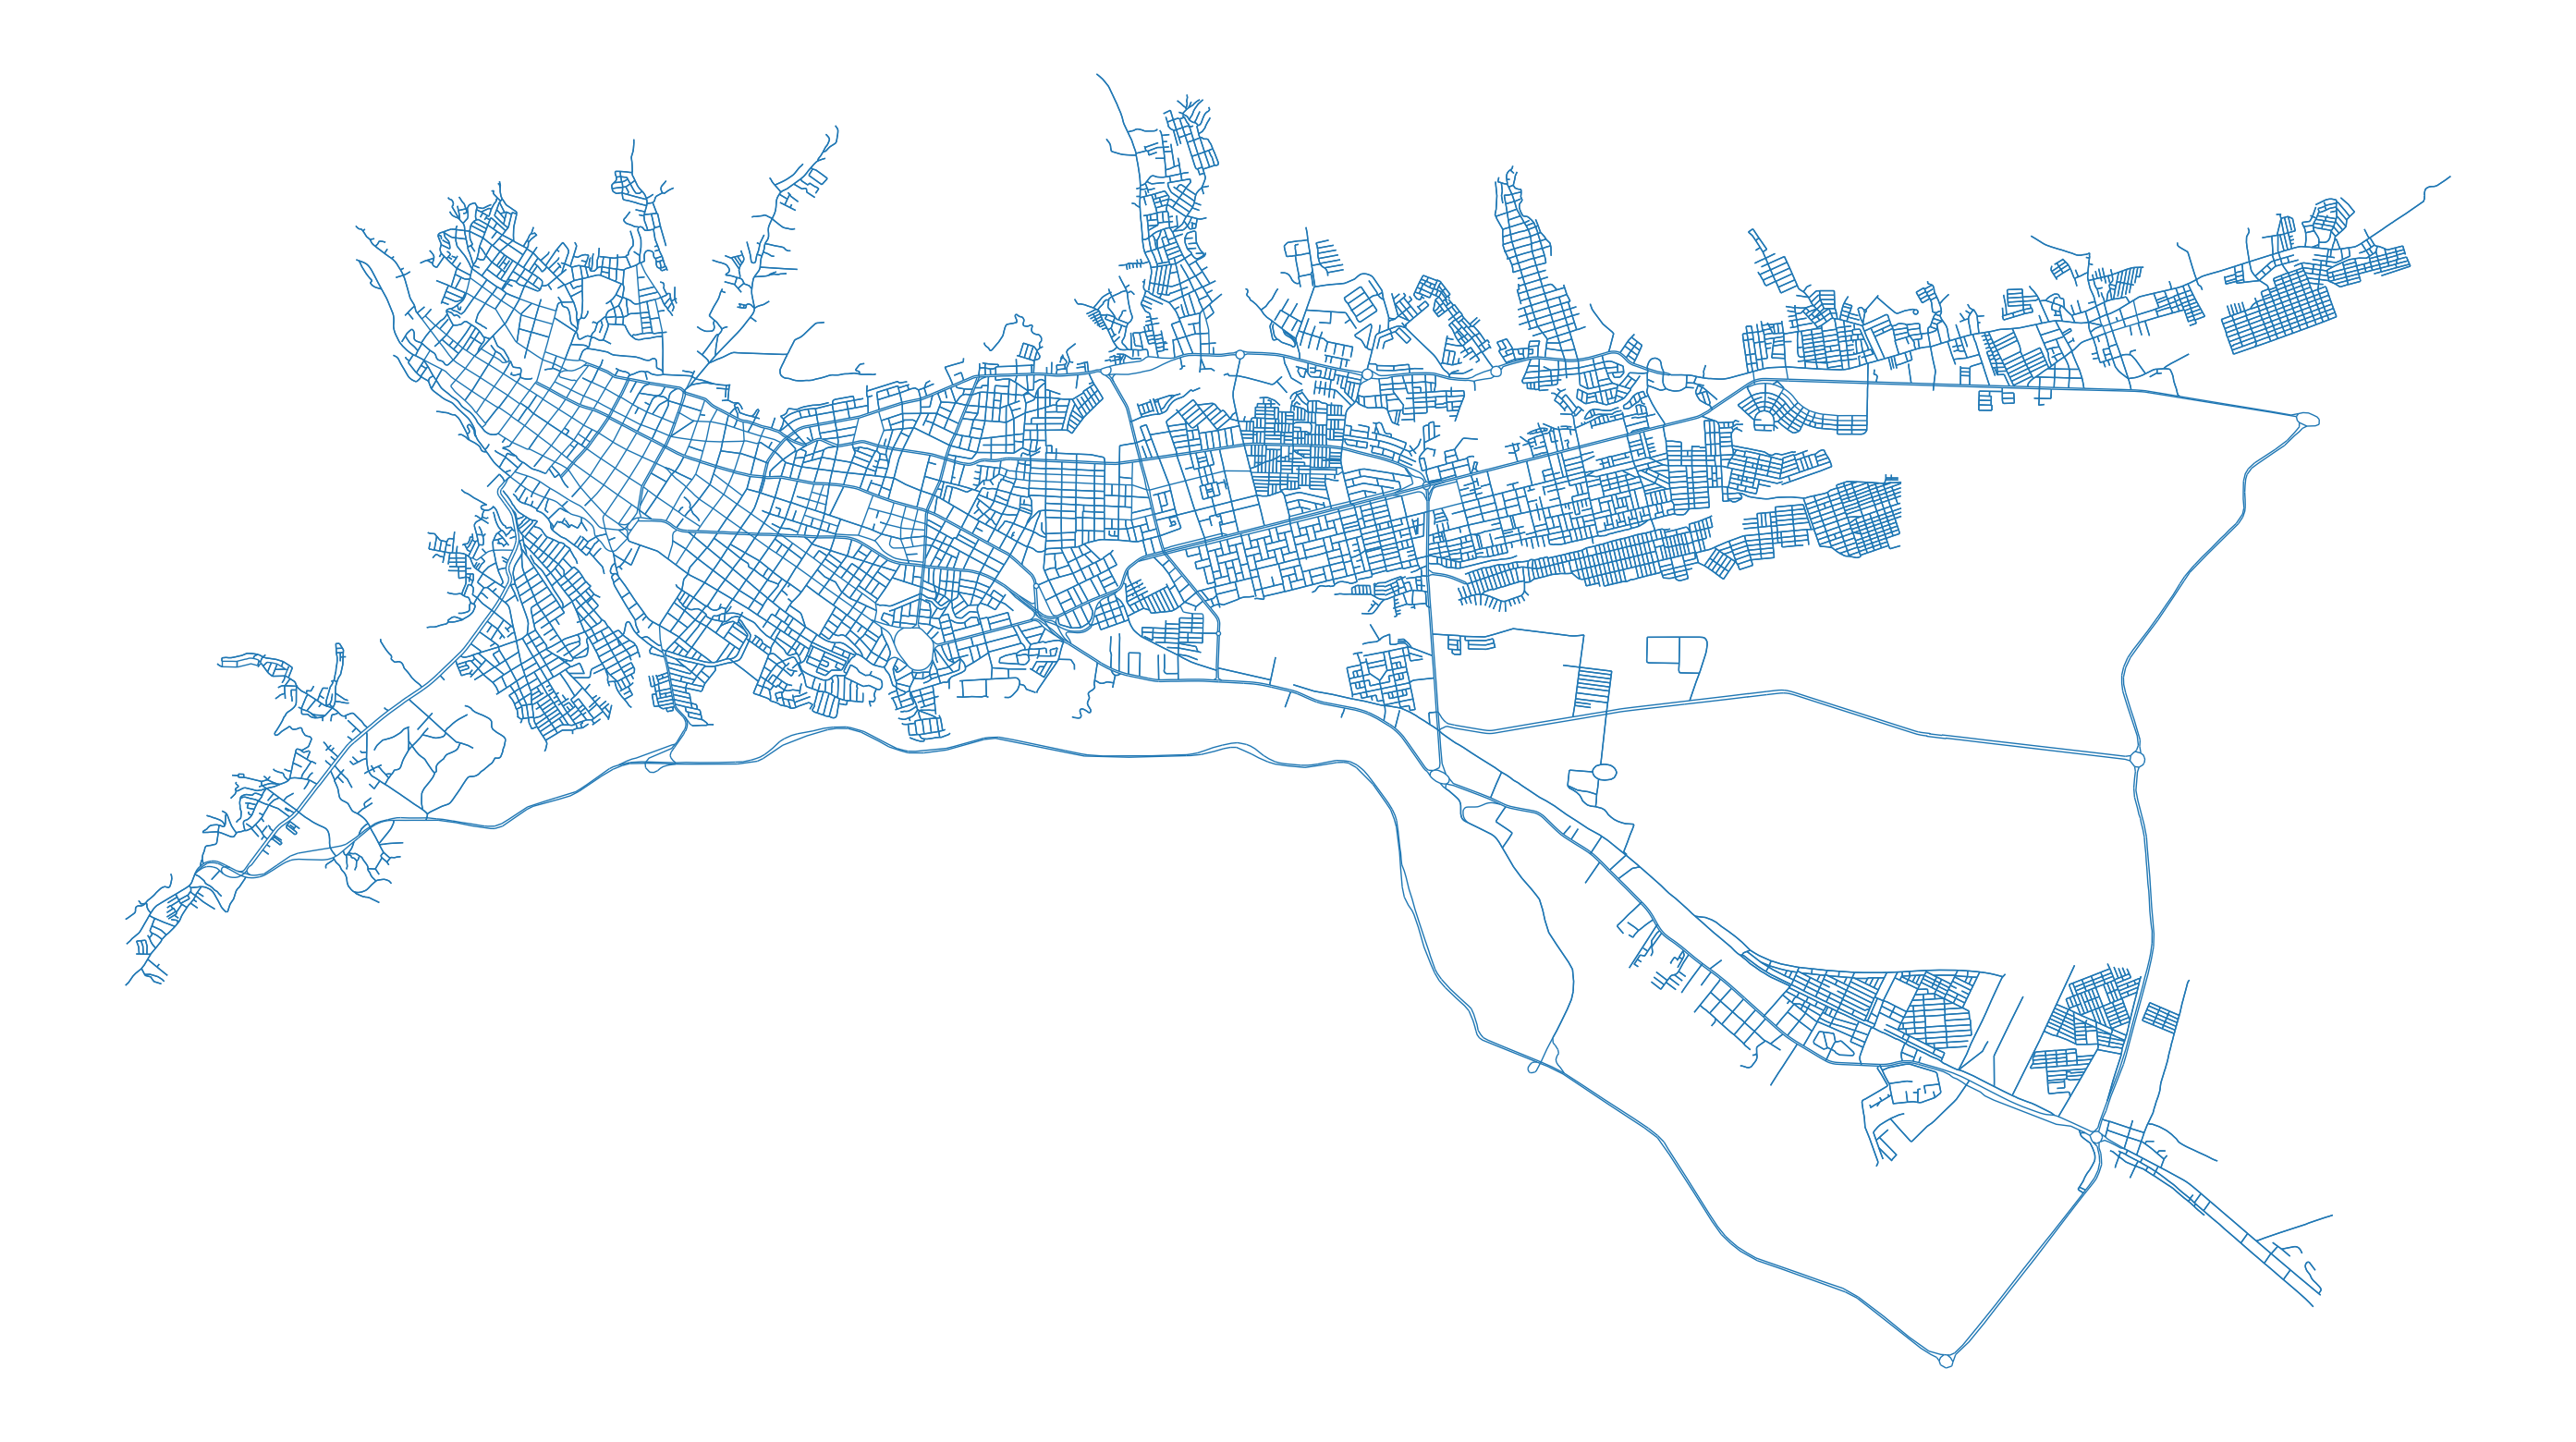

In [95]:
fig, ax = plt.subplots(figsize=(40, 20))
red.plot(ax=ax, linewidth=1)
ax.set_axis_off()
# Guardar la imagen en formato PNG
plt.savefig('mallavialibg.png', format='png', dpi=300)

In [96]:
archivo = pd.read_csv('..\\Programa\\Datos\\nuevo.csv')
archivo

,DIR,NOMENCLATU,CATEGORIA,NOMEN,JER_POT,JER_PMMEP,Long_KM,Shape_Leng,angulo1,angulo2,slope,FID,velocity_k,long_m,TV,geometry,start_lat,start_lon,end_lat,end_lon
0,1,CALLE 20,CALLE-PRIMER-ORDEN,Cl 20,Malla víal local,Malla víal local,0.068802,68.801895,36.123963,36.445994,1.828875,0,22.003983,68.801895,0.187608,LINESTRING (-75.23551099957909 4.4371009997764...,4.437101,-75.235511,4.437603,-75.235145
1,1,CALLE 19,CALLE-PRIMER-ORDEN,Cl 19,Malla víal arterial primaria,Malla víal arterial primaria,0.089808,89.808234,199.524533,216.501489,-4.077699,1,22.026378,89.808234,0.244638,LINESTRING (-75.23516099986428 4.4383420003005...,4.438342,-75.235161,4.437640,-75.235533
2,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial secundari,Colectoras,0.102935,102.934913,302.580455,303.041108,4.033832,2,14.825392,102.934913,0.416589,LINESTRING (-75.23489799990543 4.4397369998130...,4.439737,-75.234898,4.440240,-75.235678
3,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial secundari,0.117046,117.046090,114.747128,114.807639,-5.290759,3,26.063237,117.046090,0.269451,LINESTRING (-75.23583699976534 4.4419580000737...,4.441958,-75.235837,4.441516,-75.234879
4,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial primaria,0.114319,114.318731,117.520102,118.003455,-2.102832,4,35.087447,114.318731,0.195487,LINESTRING (-75.236137000241 4.443464999805958...,4.443465,-75.236137,4.442985,-75.235225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27932,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,312.258774,312.258774,-1.806031,27932,17.543749,19.999996,0.068400,LINESTRING (-75.25594915567848 4.4197993935415...,4.419799,-75.255949,4.419921,-75.256083
27933,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,132.258774,132.258774,1.806031,27933,13.659199,19.999996,0.087853,LINESTRING (-75.25608268464403 4.4199207822956...,4.419921,-75.256083,4.419799,-75.255949
27934,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,186.866659,186.866659,2.216708,27934,13.217541,19.719950,0.089517,LINESTRING (-75.17573942169315 4.4259646688973...,4.425965,-75.175739,4.425788,-75.175760
27935,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,6.866659,6.866659,-2.216708,27935,17.985408,19.719950,0.065786,LINESTRING (-75.1757603993574 4.42578761871231...,4.425788,-75.175760,4.425965,-75.175739


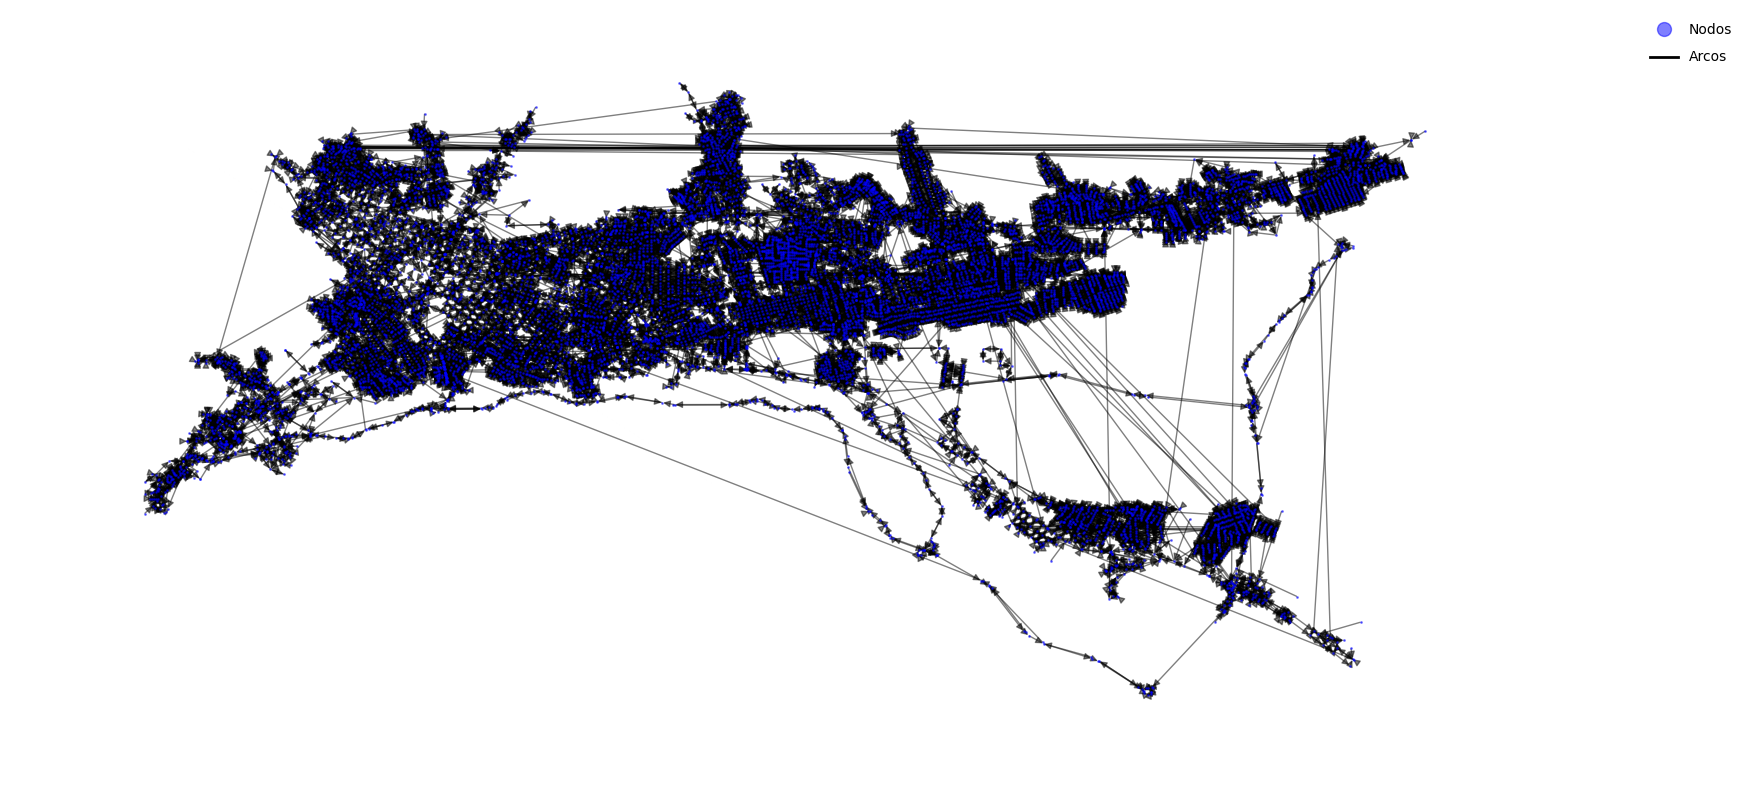

In [97]:
# Crear un grafo vacío con NetworkX
G = nx.DiGraph()

# Obtener la ruta del archivo CSV
ruta_archivo = os.path.join(os.getcwd(), 'Datos', 'nuevo.csv')

# Leer solo las primeras x filas del archivo CSV
#archivo = pd.read_csv(ruta_archivo, nrows=100)

# Diccionario para almacenar los nodos existentes con sus coordenadas
nodos_existentes = {}

# Agregar nodos y arcos al grafo
for i, row in archivo.iterrows():
    # Agregar nodo de inicio si no existe en el grafo
    start_lat, start_lon = row['start_lat'], row['start_lon']
    start_node = next((node_id for node_id, data in G.nodes(data=True) if data.get('lat') == start_lat and data.get('lon') == start_lon), None)
    if start_node is None:
        start_node = i
        G.add_node(start_node, lat=start_lat, lon=start_lon)
    
    # Agregar nodo de fin si no existe en el grafo
    end_lat, end_lon = row['end_lat'], row['end_lon']
    end_node = next((node_id for node_id, data in G.nodes(data=True) if data.get('lat') == end_lat and data.get('lon') == end_lon), None)
    if end_node is None:
        end_node = i + 1
        G.add_node(end_node, lat=end_lat, lon=end_lon)
    
    # Agregar la arista al grafo
    G.add_edge(start_node, end_node, weight=row['TV'])


# Obtener las posiciones de los nodos en un diccionario
pos = {}
for node_id, data in G.nodes(data=True):
    lat = data['lat']
    lon = data['lon']
    pos[node_id] = (lon, lat)

# Dibujar el grafo con las posiciones geográficas de los nodos
fig, ax = plt.subplots(figsize=(20,10))
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=1, alpha=0.5, ax=ax, edge_color='black', node_color='blue', width=1)

# Agregar la leyenda para los nodos
ax.plot([], [], 'o', color='blue', markersize=10, label='Nodos', alpha=0.5)
# Agregar la leyenda para los arcos
ax.plot([], [], '-', color='black', linewidth=2, label='Arcos')
# Mostrar las dos leyendas
ax.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left', bbox_to_anchor=(1.05, 1))
ax.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left', bbox_to_anchor=(1.05, 1))

ax.set_axis_off()
plt.show()


In [105]:
# Obtener las posiciones de los nodos en un diccionario
pos = {}
for node_id, data in G.nodes(data=True):
    lat = data['lat']
    lon = data['lon']
    pos[node_id] = (lon, lat)

# Imprimir las coordenadas de cada nodo
for node_id, coordinates in pos.items():
    print(f" {node_id}: {coordinates}")



 0: (-75.23551099957909, 4.43710099977648)
 1: (-75.23516099986428, 4.438342000300594)
 2: (-75.23489799990543, 4.43973699981306)
 3: (-75.23583699976534, 4.441958000073784)
 4: (-75.236137000241, 4.443464999805959)
 5: (-75.23568900026929, 4.446210999986734)
 6: (-75.20377600036308, 4.439489999853951)
 7: (-75.21953699956316, 4.441970000053114)
 8: (-75.235786999767, 4.436561999895676)
 9: (-75.23577200024869, 4.43734000042522)
 10: (-75.23562700027414, 4.437519000151894)
 11: (-75.23553299959595, 4.437640000247974)
 12: (-75.2371470001619, 4.4456949997132496)
 13: (-75.23620699984674, 4.445171000324798)
 14: (-75.2366900002677, 4.446444999607848)
 15: (-75.23758100011725, 4.446897999563203)
 16: (-75.23890399975443, 4.446147999931628)
 17: (-75.23873100000596, 4.444622999733189)
 18: (-75.23846700038331, 4.445243000121038)
 19: (-75.23798900013239, 4.446088999732595)
 20: (-75.23924499993447, 4.445614999908782)
 21: (-75.23762000036352, 4.444874000308625)
 22: (-75.23847899981003, 4.

In [99]:
# Crear la matriz de incidencia
incidence_matrix = nx.incidence_matrix(G, oriented=False).toarray()

# Crear el DataFrame
nodes = list(G.nodes())
df = pd.DataFrame(data=np.zeros((len(nodes), len(nodes))), index=nodes, columns=nodes)
for i, j, weight in G.edges(data='weight'):
    df.loc[i, j] = weight

# Imprimir la matriz de incidencia y el DataFrame
print(incidence_matrix)
print(df)

# Exportar el DataFrame a un archivo CSV
if selección == 1:
    df.to_csv('Resultados/matriz_incidencia.csv', index=True)
elif selección == 2:
    print()

[[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
       0         1         2         3         4         5      6      7      \
0        0.0  0.187608  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
1        0.0  0.000000  0.244638  0.000000  0.000000  0.000000    0.0    0.0   
2        0.0  0.301413  0.000000  0.416589  0.000000  0.000000    0.0    0.0   
3        0.0  0.000000  0.000000  0.000000  0.269451  0.000000    0.0    0.0   
4        0.0  0.000000  0.000000  0.000000  0.000000  0.195487    0.0    0.0   
...      ...       ...       ...       ...       ...       ...    ...    ...   
27930    0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
27931    0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
27932    0.0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
27934    0.0  0.000000  0.000000  0.000000  

In [100]:
# Crear un diccionario para almacenar los caminos mínimos
all_shortest_paths = {}

# Calcular los caminos mínimos desde cada nodo a todos los demás nodos
for source_node in G.nodes():
    shortest_paths = nx.single_source_dijkstra_path_length(G, source=source_node, weight='weight')
    all_shortest_paths[source_node] = shortest_paths

# Obtener los nombres de los nodos
node_names = list(G.nodes())

# Crear una matriz para representar los caminos mínimos
num_nodes = len(G.nodes)
shortest_paths_matrix = np.full((num_nodes, num_nodes), np.inf)

# Velocidad promedio de bicicleta
vel = 30 #km/h

# Llenar la matriz con las longitudes de los caminos mínimos
for i in range(num_nodes):
    for j in range(num_nodes):
        # Verificar si el nodo fuente tiene caminos mínimos calculados
        if i in all_shortest_paths:
            # Verificar si la clave existe en el diccionario antes de acceder a ella
            if j in all_shortest_paths[i]:
                shortest_paths_matrix[i, j] = all_shortest_paths[i][j]
            else:
                # Calcular la distancia euclidiana entre nodos no conectados usando posiciones del grafo
                coord_i = np.array(pos[node_names[i]])  # Coordenadas del primer nodo
                coord_j = np.array(pos[node_names[j]])  # Coordenadas del último nodo
                distance = np.linalg.norm(coord_i - coord_j)  # Distancia euclidiana
                time = distance/(vel/3.3) * 1000 # cálcula el tiempo de recorrido
                shortest_paths_matrix[i, j] = time
        else:
            # Calcular la distancia euclidiana entre nodos no conectados usando posiciones del grafo
            coord_i = np.array(pos[node_names[i]])  # Coordenadas del primer nodo
            coord_j = np.array(pos[node_names[j]])  # Coordenadas del último nodo
            distance = np.linalg.norm(coord_i - coord_j)  # Distancia euclidiana
            time = distance/(vel/3.3) * 1000 # cálcula el tiempo de recorrido
            shortest_paths_matrix[i, j] = time
            
# Imprimir la matriz de caminos mínimos
print("Matriz de Caminos Mínimos:")
print(shortest_paths_matrix)

# Convertir la matriz de caminos mínimos a un DataFrame
df_shortest_paths = pd.DataFrame(shortest_paths_matrix, index=node_names, columns=node_names)

# Guardar el DataFrame en un archivo CSV en la carpeta de Resultados
if selección == 1:
    df_shortest_paths.to_csv('Resultados/matriz_caminos_minimos.csv')
elif selección == 2:
    print()



Matriz de Caminos Mínimos:
[[0.         0.18760757 0.43224579 ... 2.94558517 6.68801754 8.54813755]
 [2.57342997 0.         0.24463822 ... 3.06419742 6.67666681 8.36052997]
 [2.32879174 0.30141323 0.         ... 3.18935379 6.68146055 8.11589175]
 ...
 [6.25957544 6.44718301 6.69182123 ... 0.         0.16263263 0.67446726]
 [6.09694281 6.28455038 6.5291886  ... 0.10053054 0.         0.51183462]
 [6.23468014 6.42228771 6.66692594 ... 5.26561448 3.75744134 0.        ]]


In [101]:
# Sumar las filas de la matriz
suma_filas = df_shortest_paths.sum(axis=1)
print("Suma de filas")
print(suma_filas)


Suma de filas
0        59424.964033
1        57937.829961
2        56446.428959
3        53891.669210
4        52935.768251
             ...     
27930    57700.969239
27931    68798.643653
27932    78078.848781
27934    65056.009289
27937    64655.403661
Length: 10940, dtype: float64


In [102]:
# calcular los tiempos promedios
total_nodos = len(node_names)
print("Nodos totales: ", total_nodos)

# Calcular e imprimir el promedio de cada fila
promedios = suma_filas / total_nodos
print("Tiempos promedios:")
print(promedios)

promedios.to_csv('Resultados/tiempos_promedios.csv')

Nodos totales:  10940
Tiempos promedios:
0        5.431898
1        5.295963
2        5.159637
3        4.926112
4        4.838736
           ...   
27930    5.274312
27931    6.288724
27932    7.137006
27934    5.946619
27937    5.910000
Length: 10940, dtype: float64
